# Import Libraries [Step 2]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Check version of matplot
mpl.__version__

'3.7.2'

In [3]:
# Enable visualizations through matplot
%matplotlib inline

# Import Dataset

In [4]:
# Creating a path
path = r'C:\Users\mduong\Documents\Python Scripts'

In [5]:
# Import crime data CSV file
df_crime = pd.read_csv(os.path.join(path, 'denver2_crimedata_2018-2023_cleaned.csv'), low_memory=False, index_col = False)

# Clean Data [Step 3]

In [6]:
# Show how many rows and columns are in the crime data dataframe(df)
df_crime.shape

(377793, 27)

In [7]:
# Show detailed information about the crime data df
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377793 entries, 0 to 377792
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               377793 non-null  int64  
 1   incident_id              377793 non-null  float64
 2   offense_id               377793 non-null  float64
 3   offense_code             377793 non-null  int64  
 4   offense_code_extension   377793 non-null  int64  
 5   crime                    377793 non-null  object 
 6   crime_category           377793 non-null  object 
 7   crime_startdate          377793 non-null  object 
 8   crime_yr                 377793 non-null  int64  
 9   day_of_week_first        377793 non-null  object 
 10  crime_enddate            206825 non-null  object 
 11  day_btwn_first_last      206825 non-null  float64
 12  reported_date            377793 non-null  object 
 13  day_btwn_first_reported  377793 non-null  float64
 14  repo

In [8]:
# Show the first five rows in the crime data df
df_crime.head()

,Unnamed: 0,incident_id,offense_id,offense_code,offense_code_extension,crime,crime_category,crime_startdate,crime_yr,day_of_week_first,...,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,county,is_crime,is_traffic,victim_count
0,0,2.023601e+10,2.020000e+16,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,6/29/2018 17:00,2018,Fri,...,1736251.0,-104.674045,39.851926,7,759,DIA,Denver,1,0,1
1,1,2.023135e+09,2.020000e+15,1102,1,sex-aslt-rape-pot,sexual-assault,3/15/2018 12:45,2018,Thu,...,NaN,NaN,NaN,1,122,Villa Park,Denver,1,0,1
2,2,2.022602e+10,2.020000e+16,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,6/1/2018 16:20,2018,Fri,...,1715591.0,-104.895448,39.796554,5,511,Central Park,Denver,1,0,1
3,3,2.023191e+09,2.020000e+15,1109,0,sex-aslt-non-rape,sexual-assault,1/1/2019 8:00,2019,Tue,...,NaN,NaN,NaN,2,221,Northeast Park Hill,Denver,1,0,1
4,4,2.023387e+09,2.020000e+15,2399,0,theft-other,larceny,6/1/2019 12:00,2019,Sat,...,1683676.0,-105.035631,39.709575,4,412,Westwood,Denver,1,0,1


In [9]:
# Remove unnecessary columns
df_crime = df_crime.drop(columns = ['Unnamed: 0', 'offense_id', 'offense_code', 'offense_code_extension'])

In [10]:
# Check columns
df_crime.columns

Index(['incident_id', 'crime', 'crime_category', 'crime_startdate', 'crime_yr',
       'day_of_week_first', 'crime_enddate', 'day_btwn_first_last',
       'reported_date', 'day_btwn_first_reported', 'reported_yr',
       'incident_address', 'geo_x', 'geo_y', 'geo_lon', 'geo_lat',
       'district_id', 'precinct_id', 'neighborhood_id', 'county', 'is_crime',
       'is_traffic', 'victim_count'],
      dtype='object')

In [11]:
# Check for mixed-type data in df_crime
for col in df_crime.columns.tolist():
  weird = (df_crime[[col]].applymap(type) != df_crime[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_crime[weird]) > 0:
    print (col, ' mixed')
  else: print(col, ' consistent')

incident_id  consistent
crime  consistent
crime_category  consistent
crime_startdate  consistent
crime_yr  consistent
day_of_week_first  consistent
crime_enddate  mixed
day_btwn_first_last  consistent
reported_date  consistent
day_btwn_first_reported  consistent
reported_yr  consistent
incident_address  mixed
geo_x  consistent
geo_y  consistent
geo_lon  consistent
geo_lat  consistent
district_id  mixed
precinct_id  consistent
neighborhood_id  mixed
county  consistent
is_crime  consistent
is_traffic  consistent
victim_count  consistent


In [12]:
# Check for missing values 
df_crime.isnull().sum()

incident_id                     0
crime                           0
crime_category                  0
crime_startdate                 0
crime_yr                        0
day_of_week_first               0
crime_enddate              170968
day_btwn_first_last        170968
reported_date                   0
day_btwn_first_reported         0
reported_yr                     0
incident_address            15177
geo_x                       15177
geo_y                       15177
geo_lon                     15452
geo_lat                     15452
district_id                    57
precinct_id                     0
neighborhood_id               684
county                          0
is_crime                        0
is_traffic                      0
victim_count                    0
dtype: int64

In [13]:
df_nonull = df_crime.dropna()

In [14]:
# Check for missing values
df_nonull.isnull().sum()

incident_id                0
crime                      0
crime_category             0
crime_startdate            0
crime_yr                   0
day_of_week_first          0
crime_enddate              0
day_btwn_first_last        0
reported_date              0
day_btwn_first_reported    0
reported_yr                0
incident_address           0
geo_x                      0
geo_y                      0
geo_lon                    0
geo_lat                    0
district_id                0
precinct_id                0
neighborhood_id            0
county                     0
is_crime                   0
is_traffic                 0
victim_count               0
dtype: int64

In [15]:
# Check mean for days between first date of incident and reported date
df_nonull['day_btwn_first_reported'].mean()

6.497433109044132

In [16]:
# Check median for days between first date of incident and reported date
df_nonull['day_btwn_first_reported'].median()

0.69

In [17]:
# Check max for days between first date of incident and reported date
df_nonull['day_btwn_first_reported'].max()

1843.85

# Explore Data Using Scatterplots [Step 4]

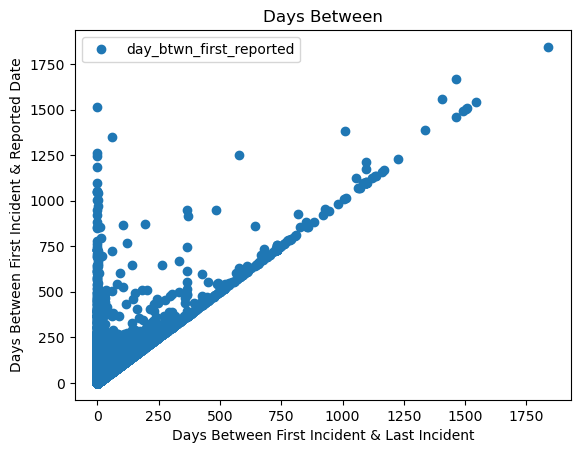

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_nonull.plot(x = 'day_btwn_first_last', y='day_btwn_first_reported',style='o') 
# The style option creates a scatterplot; without it, we only have lines.
plt.title('Days Between')  
plt.xlabel('Days Between First Incident & Last Incident')  
plt.ylabel('Days Between First Incident & Reported Date')  
plt.show()

# State Hypothesis [Step 5]

As days between the first and last date of incident increases, so will the days between first incident and the report date ... which makes sense as people would likely report a crime once they find out it has happened, unless it's a stigmatized crime such as a sex offense. 

# Reshape Variables into NumPy Arrays [Step 6]

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.

x = df_nonull['day_btwn_first_last'].values.reshape(-1,1)
y = df_nonull['day_btwn_first_reported'].values.reshape(-1,1)

In [20]:
print(x)

[[1838.83]
 [1543.  ]
 [1508.96]
 ...
 [   0.  ]
 [   0.  ]
 [   0.  ]]


In [21]:
print(y)

[[1843.85]
 [1543.01]
 [1509.03]
 ...
 [   3.01]
 [  35.01]
 [   2.35]]


# Split Data into Training & Test Sets [Step 7]

In [22]:
# Split data into a training set and a test set.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Linear Regression [Step 8]

In [23]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [24]:
# Fit model created to the training set
regression.fit(x_train, y_train)

LinearRegression()

In [25]:
# Create a prediction for y on the test set
y_predicted = regression.predict(x_test)

# Create Plot for Regression Line on Test Set [Step 9]

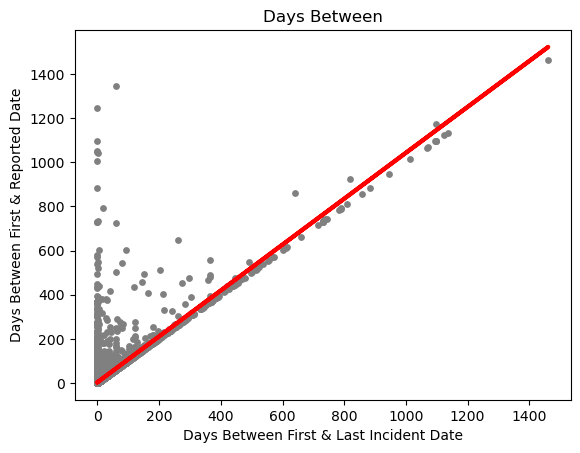

In [26]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(x_test, y_test, color='gray', s = 15)
plot_test.plot(x_test, y_predicted, color='red', linewidth =3)
plot_test.title('Days Between')
plot_test.xlabel('Days Between First & Last Incident Date')
plot_test.ylabel('Days Between First & Reported Date')
plot_test.show()

# Write Own Interpretation [Step 10]

As established, I don't have the best dataset for this, but I can understand what it's supposed to do based on what is shown, the sample in the lesson, and other students' examples. It makes sense that when people find out about the incident that they'd report it ASAP unless they just didn't know that it happened, or if maybe there's societal stigma about reporting, especially with sex offenses. There are extremes in this dataset, but unfortunately I can't vet the accuracy of these; I have to just trust that the data Denver Police Department gave out publicly is accurate and reliable. 

# Check Model Performance Statistics - MSE and R2 score [Step 11]

In [27]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [28]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.04062723]]
Mean squared error:  450.648614287847
R2 score:  0.6800165039045396


The slope being a positive number means there is a positive relationship between the two varibles; when one increases, so does the other. 

The mean squared error (MSE) is quite high at 450, meaning the set of data points are not close to one another, thus the accuracy of the dataset is questionable. According to our lesson, "The larger the distance, the farther away the regression line is from the data points, indicating that the regression line isn’t an accurate representation of the data." That's unfortunate for our analysis here, but it may be reflective of other issues, and we can't begin to suggest a solution without diagnosing the problem first. For example, is the large range due to data entry issues, or perhaps these crimes really did have long delays in detection and reporting? We already know that these two variables aren't good for the regression analysis, but it does give us some insight into the quality of the dataset itself. 

The 0.68 for the R2 score, or 68% is not bad, but not that great either. The model isn't performing that terribly, but it isn't performing great either. 

# Compare Predicted y values with Actual y values [Step 12]

In [29]:
y_predicted

array([[2.83636032],
       [2.58660979],
       [2.79473524],
       ...,
       [2.57620352],
       [2.7322976 ],
       [2.6594537 ]])

In [30]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.71,2.836360
1,0.05,2.586610
2,3.01,2.794735
3,0.04,2.586610
4,2.67,2.617829
5,4.03,6.738712
6,0.70,3.117330
7,2.14,2.794735
8,16.96,2.753110
9,0.52,2.992454


In [31]:
# Predict.

y_predicted_train = regression.predict(x_train) # This is predicting X_train!

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.04062723]]
Mean squared error:  422.20065605584523
R2 score:  0.6972100074354857


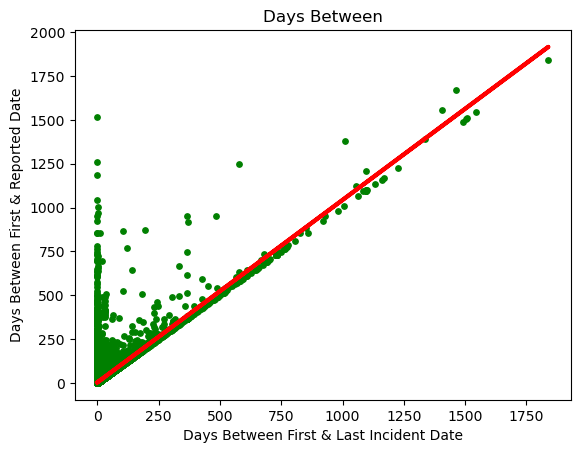

In [34]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(x_train, y_train, color='green', s = 15)
plot_test.plot(x_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Days Between')
plot_test.xlabel('Days Between First & Last Incident Date')
plot_test.ylabel('Days Between First & Reported Date')
plot_test.show()

The model performed similarly to the last one, with a positive relationship, large MSE, and ~1% difference with the R2. 

# Final Thoughts [Step 13]

I think the model performed well, especially since it had so many date points to work with. As mentioned, this isn't a great dataset, so the visualizations aren't too insightful, but at least they work. In terms of bias, I mean, there are extreme values that skew the figures a lot, but they are what Denver Police Department put out for public use, so there's not much I can do to change that fact. I do think these extremes can provide incentives for the department to review their data entry practices and maybe do some outreach to the community on the benefits of swift reporting. It's near impossible to investigate a case that happened over a certain amount of time as so many things could've changed. 